# CIFAR-10 Multiple Classes



-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [1]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_train[0].shape

(32, 32, 3)

In [4]:
import matplotlib.pyplot as plt

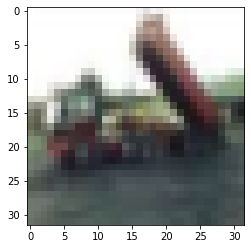

In [5]:
# FROG
plt.imshow(x_train[2])

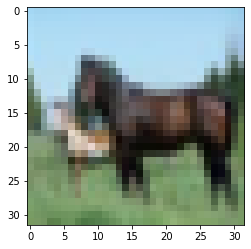

In [6]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [7]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
x_train[0].shape

(32, 32, 3)

In [9]:
#x_train.max()   #0- 255
x_train.min()

0

In [10]:
x_train = x_train/225

In [11]:
x_test = x_test/255

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [14]:
from keras.utils import to_categorical

In [15]:
y_train.shape

(50000, 1)

In [16]:
y_train[0]

array([6], dtype=uint8)

In [17]:
y_categorical_train = to_categorical(y_train,10)

In [18]:
y_categorical_train.shape

(50000, 10)

In [19]:
y_categorical_train[12]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [20]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [30]:
model = Sequential()

#filter that is used to extract the features from the images
#to perform hierarchical feature learning; which is how our brains are thought to identify objects
## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu')) # ReLU piecewise linear function 
#that will output the input directly if it is positive, otherwise, it will output zero

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])#Categorical crossentropy between an output tensor and a target tensor, 
#RMSprop is a gradient based optimization technique used in training neural networks,Gradient descent is an optimization algorithm


In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [24]:
model.fit(x_train,y_categorical_train,verbose=1,epochs=10)

Epoch 1/5
1563/1563 [==============================] - 44s 27ms/step - loss: 1.7173 - accuracy: 0.37811s -
Epoch 2/5
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1693 - accuracy: 0.5931
Epoch 3/5
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9997 - accuracy: 0.6536
Epoch 4/5
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8768 - accuracy: 0.6953
Epoch 5/5
1563/1563 [==============================] - 43s 28ms/step - loss: 0.7915 - accuracy: 0.72860s - loss: 0.791


In [33]:
# Careful, don't overwrite our file!
model.save('cifar_10epochs.h5') # Hierarchial data format

In [34]:
model.metrics_names

[]

In [28]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0969 - accuracy: 0.6546


[1.0969291925430298, 0.6546000242233276]

In [29]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

C:\Users\91950\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70      1000
           1       0.86      0.66      0.75      1000
           2       0.64      0.46      0.54      1000
           3       0.59      0.36      0.45      1000
           4       0.58      0.68      0.62      1000
           5       0.65      0.48      0.56      1000
           6       0.64      0.82      0.72      1000
           7       0.64      0.75      0.69      1000
           8       0.78      0.76      0.77      1000
           9       0.54      0.91      0.68      1000

    accuracy                           0.65     10000
   macro avg       0.67      0.65      0.65     10000
weighted avg       0.67      0.65      0.65     10000



___